## [Kaggle Python Tutorial on Machine Learning](https://www.datacamp.com/community/open-courses/kaggle-python-tutorial-on-machine-learning)

In [2]:
from __future__ import division
import csv as csv
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import sklearn.tree as tree

# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
%matplotlib inline


/Users/tp6han/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tp6han/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [17]:
df = pd.read_csv("01.2011_Census_Microdata.csv", index_col = 0)
len(df)

569741

## delete health == -9 

In [18]:
df = df[df['Health'] != -9]
df = df.drop('Residence Type',axis=1)

# len(df)
#a

與健康相關的程度 相關係數
Before getting into any machine learning models, it can be useful to see **how each of the variables is correlated with the target variable** in this case is health

In [23]:
print(df.corr()['Health'])
sorted(df.corr()['Health'])

Family Composition          -0.105751
Population Base             -0.022562
Sex                          0.032471
Age                          0.489097
Marital Status               0.345726
Student                      0.278079
Country of Birth            -0.009737
Health                       1.000000
Ethnic Group                -0.049499
Religion                     0.031437
Economic Activity            0.391788
Occupation                   0.255726
Industry                     0.179633
Hours worked per week       -0.170231
Approximated Social Grade    0.287722
Name: Health, dtype: float64


[-0.17023061452366475,
 -0.10575084357725184,
 -0.049498876780356915,
 -0.022561967352806023,
 -0.0097365431606553279,
 0.03143748501366847,
 0.03247127088574036,
 0.17963256773061054,
 0.25572621297062903,
 0.27807926891000845,
 0.28772168920720936,
 0.34572602082106252,
 0.39178787389976855,
 0.48909718522302414,
 1.0]

將df 資料數量分割

In [6]:
a = int((len(df)+1)*1/2)

In [7]:
df['Health'] = df['Health'].astype('category')
df.dtypes

Region                         object
Family Composition              int64
Population Base                 int64
Sex                             int64
Age                             int64
Marital Status                  int64
Student                         int64
Country of Birth                int64
Health                       category
Ethnic Group                    int64
Religion                        int64
Economic Activity               int64
Occupation                      int64
Industry                        int64
Hours worked per week           int64
Approximated Social Grade       int64
dtype: object

## 將原資料分成訓練集與測試集

In [8]:
train = df[:a]
test = df[a:]
# train.shape
train.dtypes

Region                         object
Family Composition              int64
Population Base                 int64
Sex                             int64
Age                             int64
Marital Status                  int64
Student                         int64
Country of Birth                int64
Health                       category
Ethnic Group                    int64
Religion                        int64
Economic Activity               int64
Occupation                      int64
Industry                        int64
Hours worked per week           int64
Approximated Social Grade       int64
dtype: object

In [9]:
test.shape

(281468, 16)

In [10]:
print(train["Health"].value_counts())
print(train["Health"].value_counts(normalize = True))
# male
print(train["Health"][train["Sex"] == 1].value_counts(normalize = True))
# female
print(train["Health"][train["Sex"] == 2].value_counts(normalize = True))
train['Health'].head()

1    132261
2     97917
3     36966
4     11225
5      3100
Name: Health, dtype: int64
1    0.469895
2    0.347878
3    0.131332
4    0.039880
5    0.011014
Name: Health, dtype: float64
1    0.484294
2    0.342933
3    0.124135
4    0.037943
5    0.010695
Name: Health, dtype: float64
1    0.455932
2    0.352674
3    0.138312
4    0.041758
5    0.011323
Name: Health, dtype: float64


Person ID
7394816    2
7394745    1
7395066    1
7395329    2
7394712    1
Name: Health, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

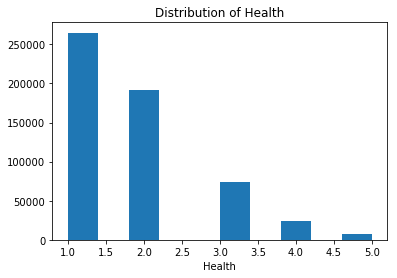

In [12]:
plt.hist(df['Health'])
plt.xlabel('Health')
plt.title('Distribution of Health')

plt.show()

In [13]:
target = train['Health'].values
targetdf.corr()['W']

[2, 1, 1, 2, 1, ..., 1, 2, 2, 5, 1]
Length: 281469
Categories (5, int64): [1, 2, 3, 4, 5]

In [15]:
df.corr()['Religion']

Family Composition          -0.020612
Population Base              0.014425
Sex                         -0.001459
Age                         -0.010025
Marital Status               0.010314
Student                     -0.028547
Country of Birth             0.160429
Ethnic Group                 0.289186
Religion                     1.000000
Economic Activity           -0.004991
Occupation                  -0.058594
Industry                    -0.060876
Hours worked per week       -0.046989
Approximated Social Grade   -0.027050
Name: Religion, dtype: float64

In [66]:
f = ["Family Composition", "Sex", "Age", "Marital Status","Student", "Country of Birth",  "Ethnic Group", "Religion", "Economic Activity", "Occupation", "Industry", "Hours worked per week", "Approximated Social Grade"]
# f = ["Family Composition",  "Age", "Marital Status",  "Ethnic Group", "Religion", "Economic Activity", "Occupation", "Industry", "Hours worked per week", "Approximated Social Grade"]
features_one = train[f].values

In [67]:
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.06670867  0.04001224  0.20020844  0.05647625  0.00342369  0.03019596
  0.03084769  0.08020482  0.10472276  0.0995091   0.15823857  0.09787896
  0.03157286]
0.725166892269


In [68]:
features_two = train[f].values
max_depth = 40
min_samples_split = 3
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split , random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.feature_importances_)
print(my_tree_two.score(features_two, target))

[ 0.06565496  0.03796362  0.21084786  0.05587335  0.00324881  0.02972316
  0.03021251  0.07742264  0.10833983  0.09630116  0.1538542   0.09878613
  0.03177178]
0.709172235664


In [32]:
test_features = train[f].values
my_prediction = my_tree_one.predict(test_features)
my_prediction


array([2, 1, 1, ..., 4, 1, 1])

In [70]:
from sklearn.ensemble import RandomForestClassifier

features_forest = train[f].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 40, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = train[f].values
pred_forest = my_forest.predict(test_features)
print(len(pred_forest))


0.725152681112
281469


In [71]:
print(forest.feature_importances_)

[ 0.06744891  0.03187731  0.13775193  0.05908634  0.01429704  0.02271025
  0.02618796  0.07825101  0.10239061  0.10846653  0.21253187  0.06867913
  0.07032112]


In [72]:
predictors = f
featimp = pd.Series(forest.feature_importances_, index=predictors).sort_values(ascending=False)
featimp

Industry                     0.212532
Age                          0.137752
Occupation                   0.108467
Economic Activity            0.102391
Religion                     0.078251
Approximated Social Grade    0.070321
Hours worked per week        0.068679
Family Composition           0.067449
Marital Status               0.059086
Sex                          0.031877
Ethnic Group                 0.026188
Country of Birth             0.022710
Student                      0.014297
dtype: float64

## [Scikit-Learn Tutorial: Baseball Analytics Pt 1](https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1)



### K-means 
is a simple clustering algorithm that partitions the data based on the number of k centroids(重心) you indicate. Each data point is assigned to a cluster based on which centroid has the lowest Euclidian distance（歐幾里德距離） from the data point.


In [25]:
df_new = pd.read_csv("01.2011_Census_Microdata.csv", index_col = 0)
df_new = df_new[df_new['Health'] != -9]
df_new = df_new.drop('Residence Type',axis=1)

In [26]:
attributes = ["Family Composition", "Sex", "Age", "Marital Status","Student", "Country of Birth",  "Ethnic Group", "Religion", "Economic Activity", "Occupation", "Industry", "Hours worked per week", "Approximated Social Grade"]
data_attributes = df_new[attributes]

使用 k-means 演算法，要指定多少群
可以透過 silhouette_score() 來決定大致上要多少群
此 function 回傳 the mean silhouette coefficient over all samples.

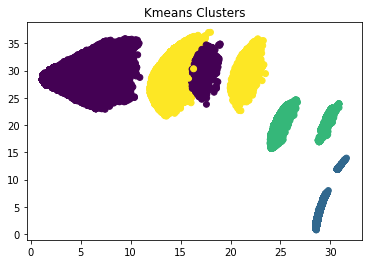

In [28]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=4, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [30]:
numeric_cols = ["Family Composition", "Sex", "Age", "Health","Marital Status","Student", "Country of Birth",  "Ethnic Group", "Religion", "Economic Activity", "Occupation", "Industry", "Hours worked per week", "Approximated Social Grade"]
data = df_new[numeric_cols]
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~df_new.index.isin(train.index)]

x_train = train[attributes]
y_train = train['Health']
x_test = test[attributes]
y_test = test['Health']

### Mean Absolute Error (MAE)
is the metric you’ll use to determine how accurate your model is.
It measures how close the predictions are to the eventual outcomes.衡量預測值與最終結果有多相近 
Specifically, for this data, that means that this error metric will provide you with the **average absolute value**（平均絕對的值）  that your prediction missed its mark.
This means that if, on average, your predictions miss the target amount by 5 wins, your error metric will be 5.

### linear regression model

In [31]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
# 原來在測試集的值 與 預測值做 mae
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

0.599194142225


In [32]:
lr.score(x_test, y_test)


0.30680749327650902

### ridge regression model

In [39]:
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

0.599793281356
